# House Price Prediction

In [146]:
#Generic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#dataset
from sklearn.datasets import fetch_california_housing

In [147]:
data = pd.read_csv("housing.csv")

In [148]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [150]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [151]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [153]:
train_data=x_train.join(y_train)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

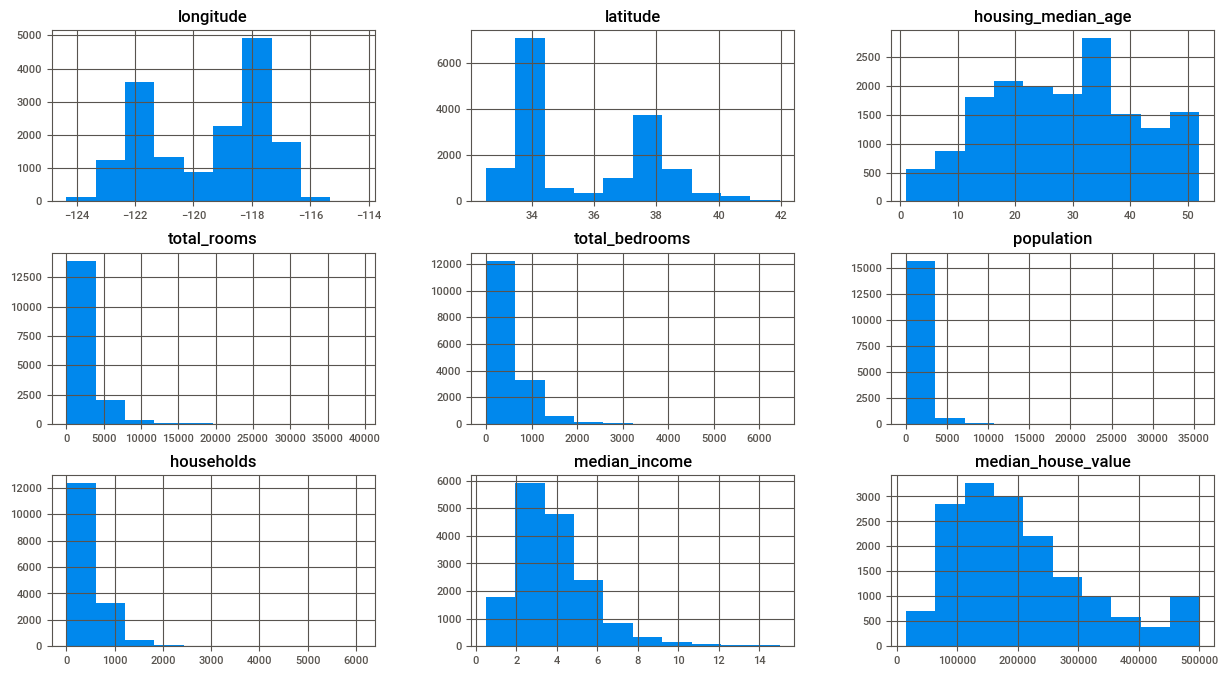

In [154]:
train_data.hist(figsize=(15, 8))

<AxesSubplot:>

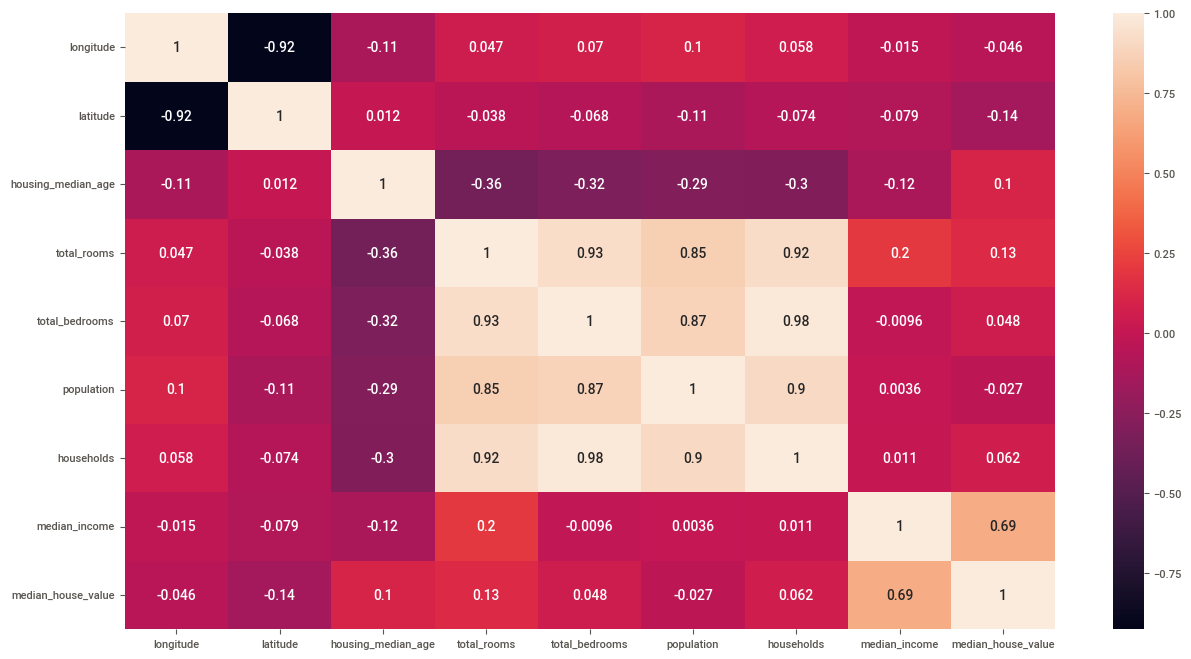

In [156]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

In [157]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

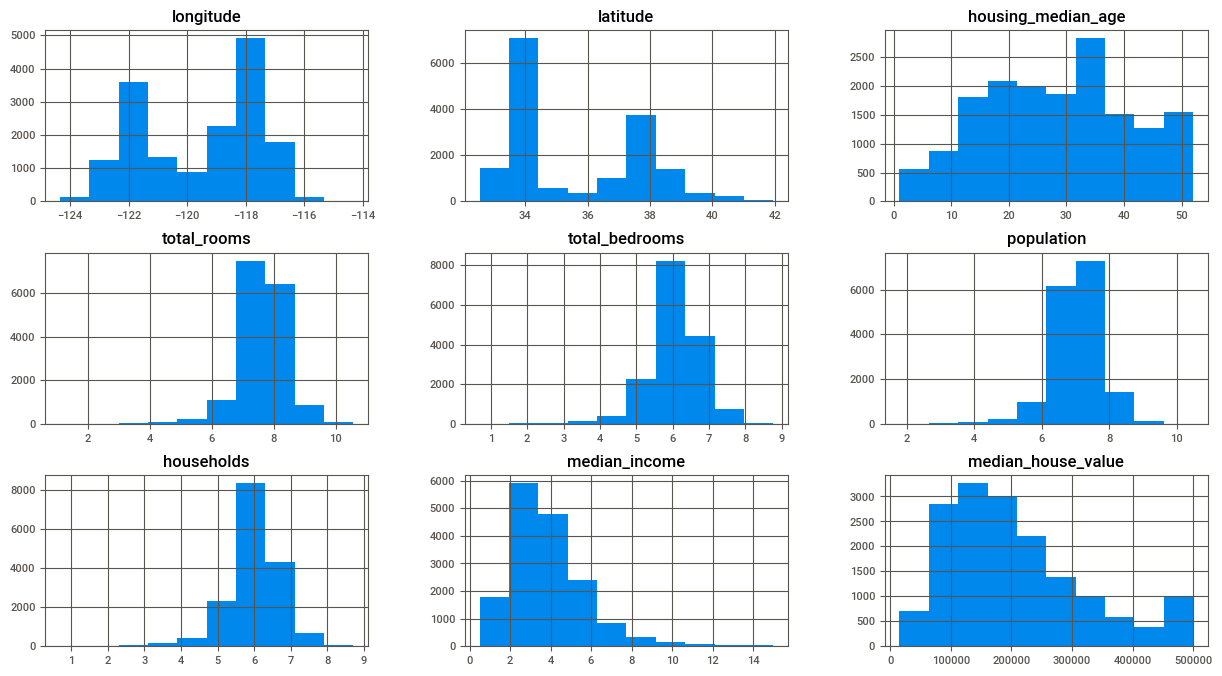

In [158]:
train_data.hist(figsize=(15,8))

In [159]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [160]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14133,-117.07,32.75,37.0,7.897668,6.309918,7.106606,6.263398,2.3148,154200.0,0,0,0,0,1
14193,-117.06,32.70,12.0,8.279951,6.603944,8.095904,6.622736,4.1120,141400.0,0,0,0,0,1
462,-122.27,37.87,35.0,8.076826,7.011214,7.424165,6.908755,1.7464,216700.0,0,0,0,1,0
5557,-118.41,33.94,45.0,7.620215,5.978886,6.991177,5.961005,4.7375,289600.0,1,0,0,0,0
18726,-122.30,40.58,19.0,6.950815,5.323010,6.226537,5.214936,1.6033,98800.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15574,-116.78,33.00,7.0,9.431963,7.574045,8.537584,7.437206,5.5102,221000.0,1,0,0,0,0
12164,-117.22,33.74,7.0,7.501634,5.958425,6.837333,5.874931,2.5221,109200.0,1,0,0,0,0
17774,-121.85,37.36,11.0,7.654443,6.385194,7.917536,6.410175,4.0452,205900.0,1,0,0,0,0
13080,-121.35,38.54,12.0,9.695233,8.119399,9.066124,8.081784,3.5691,116300.0,0,1,0,0,0


<AxesSubplot:>

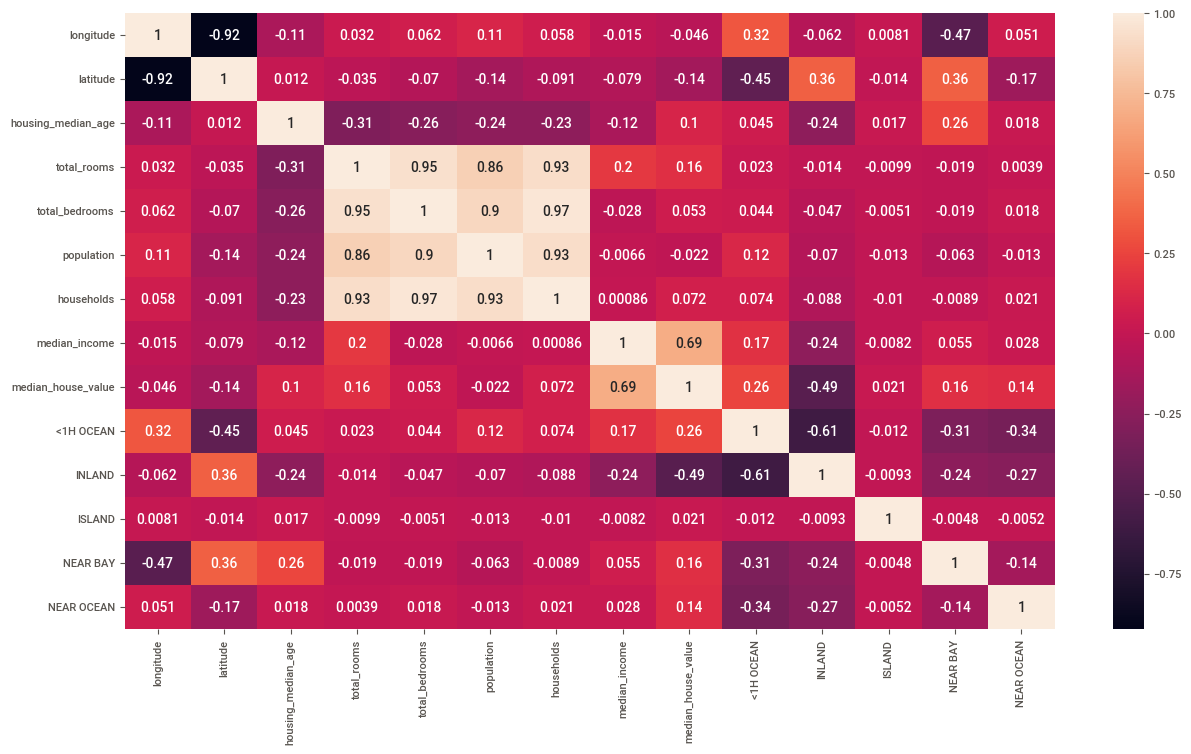

In [161]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

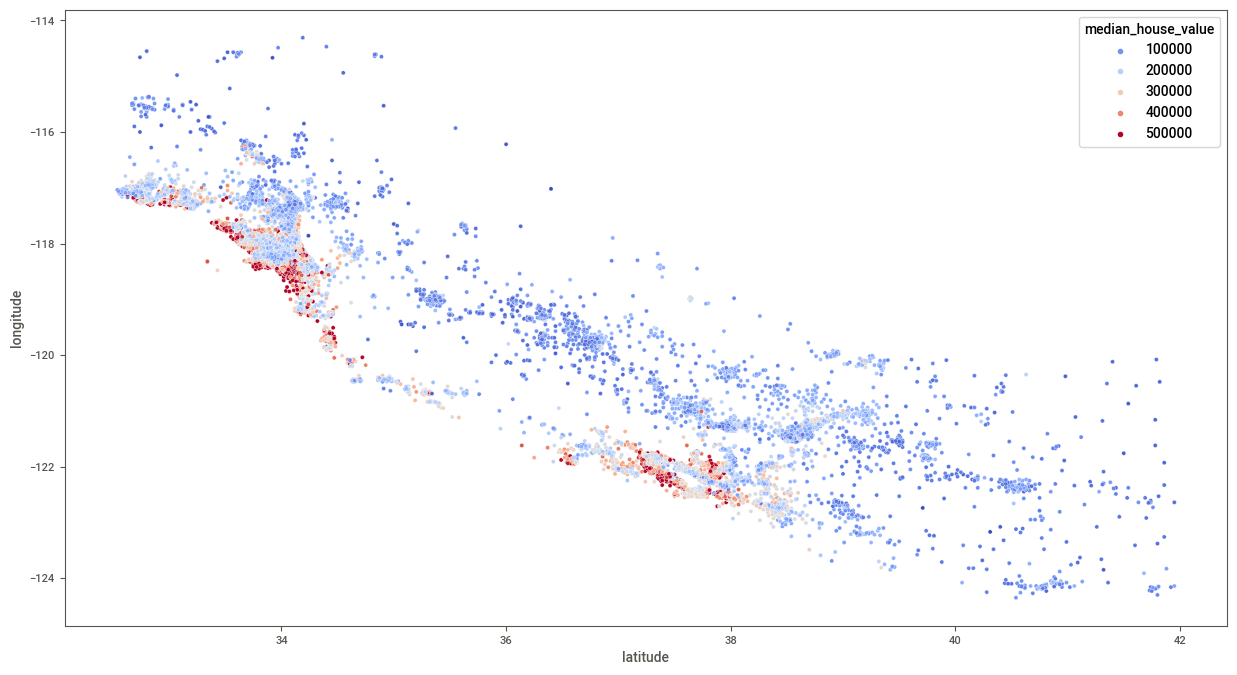

In [162]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [163]:
train_data['bedroom_ration']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<AxesSubplot:>

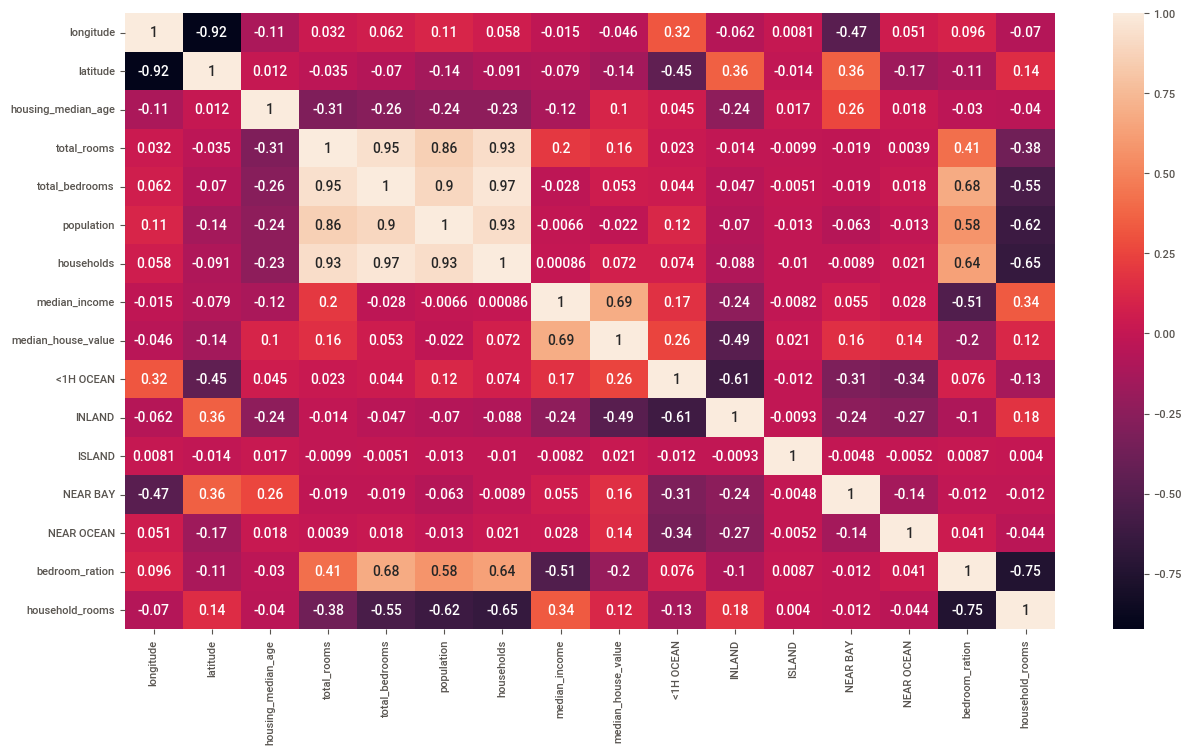

In [164]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

# Linear Regression Model

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train, y_train=train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s=scaler.fit_transform(x_train)

reg=LinearRegression()
reg.fit(x_train_s, y_train)

LinearRegression()

In [166]:
test_data=x_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ration']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']



In [167]:
x_test, y_test=test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [168]:
x_test_s= scaler.fit_transform(x_test)

In [169]:
reg.score(x_test_s, y_test)

0.668278368510671

# Random Forest Progressor

In [170]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [171]:
forest.score(x_test_s, y_test)

0.8139917807156527

In [ ]:
from sklearn.model_selection import GridSearchCV
forest=RandomForestRegressor()

param_grid={
    "n_estimators":[100, 200, 300],
    "min_samples_split":[2, 4], 
    "max_depth":[None, 4, 8]
}

grid_search=GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(x_train_s, y_train)

In [144]:
best_forest=grid_search.best_estimator_

In [145]:
best_forest.score(x_test_s, y_test)

0.8012791720353105